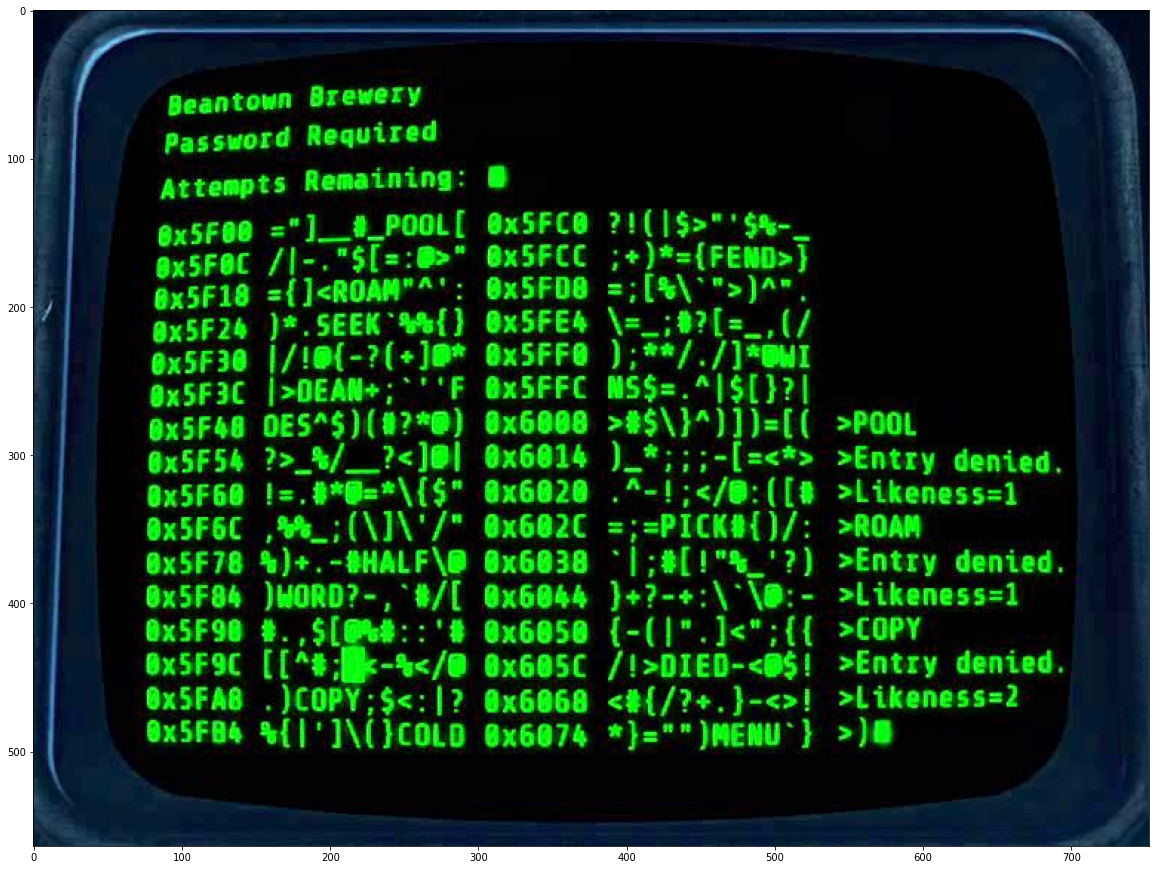

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

orig = cv2.imread('terminal.jfif')
img = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img, (7, 7), 20)
img = cv2.Canny(img, 20, 20)
img = cv2.dilate(img, np.ones((5, 5)))

contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    area = cv2.contourArea(cnt)

    if area > 400_000:
        length = cv2.arcLength(cnt, True)
        points = cv2.approxPolyDP(cnt, 0.02 * length, True)

        x, y, w, h = cv2.boundingRect(points)

        orig = orig[y:y + h, x:x + w]

        break

img = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)

thresh = 255 / 2
img = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)[1]

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4))
img = cv2.dilate(img, kernel, iterations=4)

img = cv2.Canny(img, 1, 1)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
img = cv2.dilate(img, kernel)

contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for index, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)

    if area > 10000:
        length = cv2.arcLength(cnt, True)
        points = cv2.approxPolyDP(cnt, 0.02 * length, True)

        x, y, w, h = cv2.boundingRect(points)

        cv2.imwrite(f'out_{index}.jpg', orig[y:y + h, x:x + w])
        # cv2.drawContours(orig, cnt, -1, (255, 0, 0), 2)

plt.figure(figsize=(20, 20))
plt.imshow(orig)